### **Predicting Heart disease using machine learning**

This Notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition

In a Statement,
> Given clinical parameters about a patient can we predict whether someone has heart disease or not ?

### 2. Data

The Original data came from the cleaveland data form the UCI Machine Learning Reposistory. 

### 3. Evaluation

> If we can reach 95% Accuracy at Predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the Project.

### 4. Features

This is where you'll get different information about each of the features in your data.


In [1]:
#import all the tools we need

#regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Model From Scikit- Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

**Load Data**

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration(Exploratory Data analysis or EDA)

The goal is here to find out more the data and become the subject matter expert on the 

1. What questions are you trying to solve ?
2. Whar Kind of data do we have and how do we treat different types?
3. What Missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care abouth them ?
5. How can you add, change or remove features to get more of your data?

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target'>

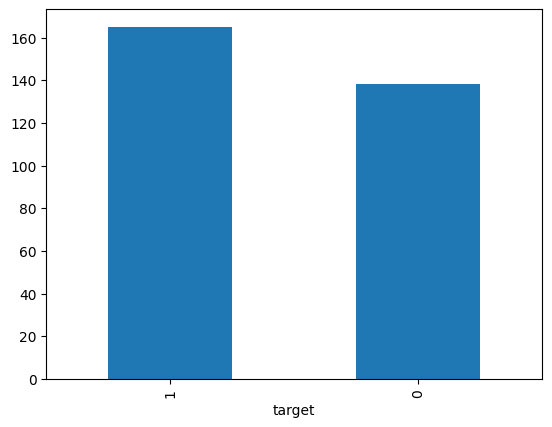

In [5]:
heart_disease['target'].value_counts().plot(kind="bar")

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [8]:
heart_disease.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(heart_disease['target'],heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


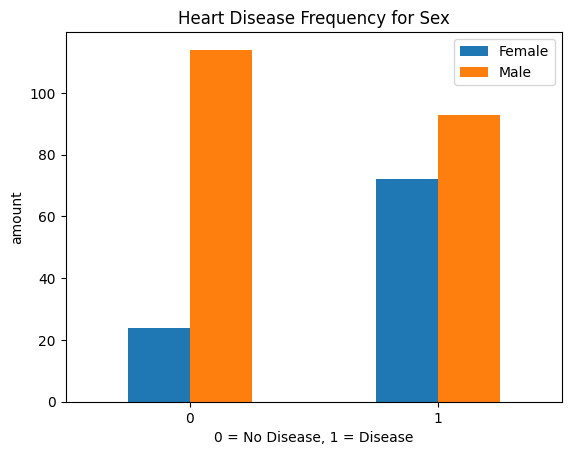

In [10]:
#Create a plot of cross tab
pd.crosstab(heart_disease['target'],heart_disease['sex']).plot(kind='bar')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("amount")
plt.legend(['Female',"Male"])
plt.xticks(rotation = 0);

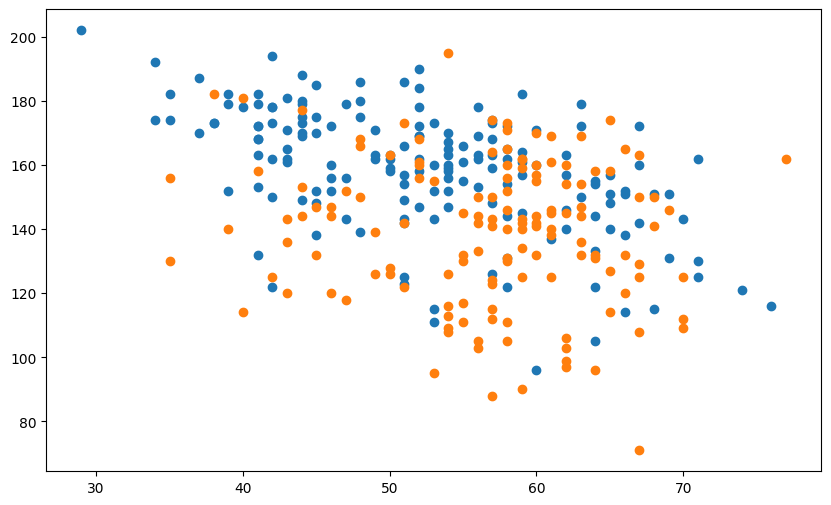

In [11]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target==1],
           heart_disease.thalach[heart_disease.target==1])

#Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.thalach[heart_disease.target==0]) 

<Axes: ylabel='Frequency'>

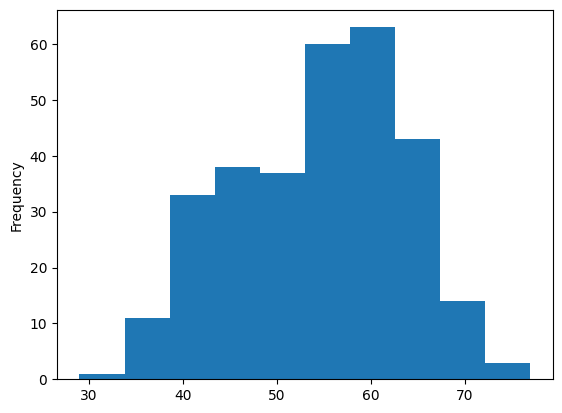

In [12]:
heart_disease.age.plot.hist()

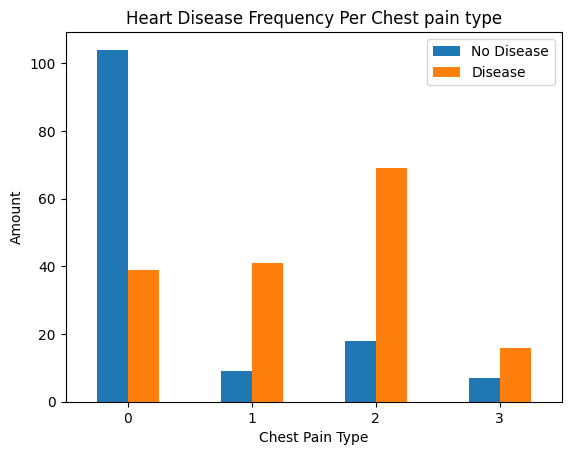

In [13]:
#Make the crosstab more visual
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind='bar')

#Add some communication 
plt.title("Heart Disease Frequency Per Chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0);

In [14]:
#Make a correlation matrix
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


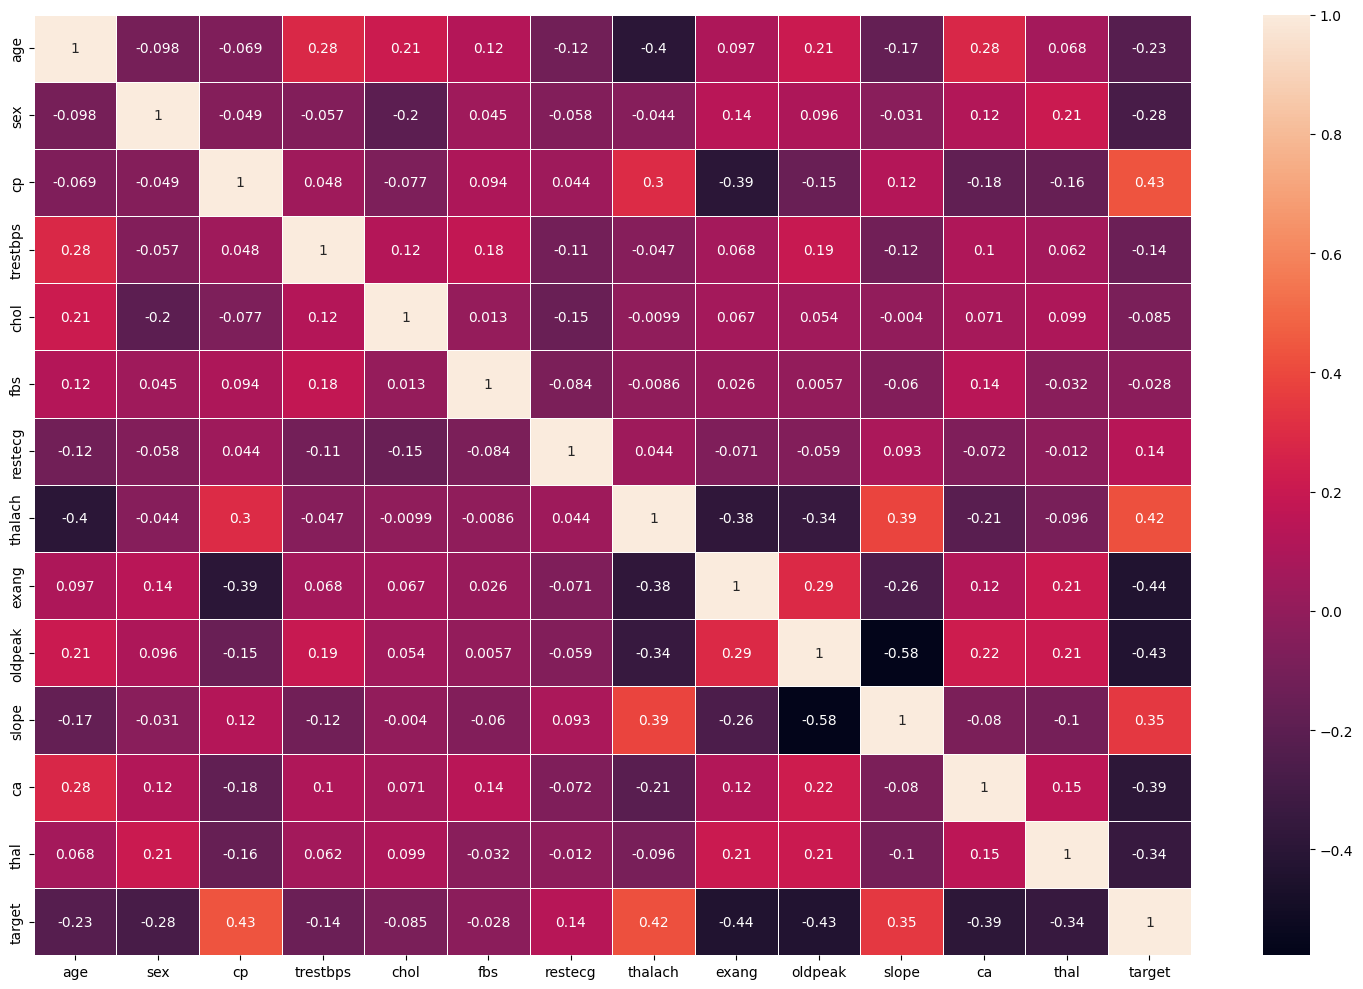

In [15]:
#Let's Make Our Correlation matrix a little prettier
corr_matrix = heart_disease.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5)
plt.tight_layout()

**Modelling**

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#Split data into x and y 
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

In [18]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
#Split data into train and test sets
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

we'll train it(Find the patterns) on the training set.

and we'll test it (use the patterns) on the test set.

we're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. RandomForestClassifier

In [21]:
#Put models in dictionary
models = {"Logistic Regression ": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and Evaluate given machine learning models.
    models:a dict of different Scikit-Learn Machine Learning models
    x_train: training data (no labels)
    x_test: testing data(no labels)
    y_train: trainig labels
    y_test: test labels
    """
    np.random.seed(42)
    #Make a dictionary to keep model score
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\itskp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression ': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

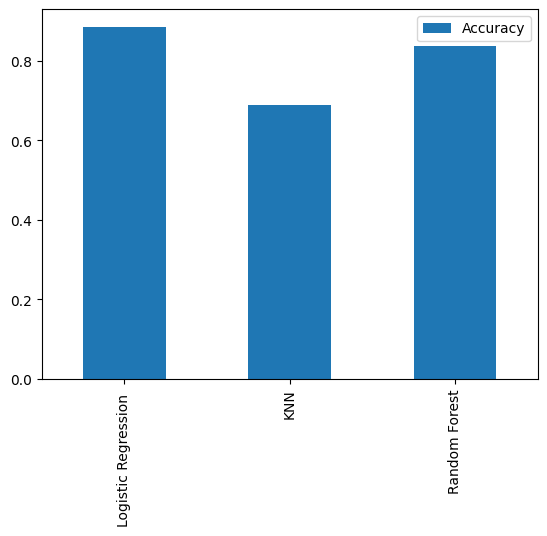

In [23]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should do ?

Let's look at the followings:
* HyperParameter Tuning
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area Under The Curve (AUC)


### Hyperparameter Tuning

In [24]:
# Let's tune KNN

train_scores = []
test_score = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN Instance
knn = KNeighborsClassifier()

#Loop through different n_neigbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(x_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #Update the test scores list
    test_score.append(knn.score(x_test,y_test))
    


In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data : 75.41%


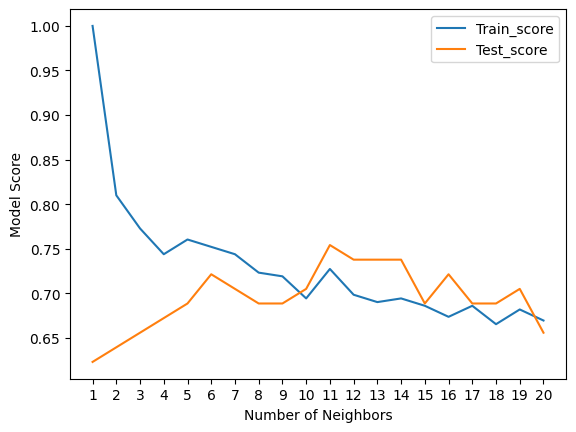

In [27]:
plt.plot(neighbors,train_scores,label = "Train_score")
plt.plot(neighbors,test_score,label = "Test_score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data : {max(test_score)*100:.2f}%")

### Hyperparameter tuning RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [28]:
#Create a hyperParameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models,let's tune them using RandomizedSearchCV..

In [29]:
#Tune Logistic Regression
np.random.seed(42)

#setup random
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [32]:
#Tune Logistic Regression
np.random.seed(42)

#setup random
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [34]:
##GridSearchCV
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
#Tune Logistic Regression
np.random.seed(42)

#setup random
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid = log_reg_grid,
                               cv = 5,
                               verbose = True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier,beyond accuracy

* Roc Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

... and it would be greatif cross validation was used where possible.

To Make Comparisions and Evaluate our trained model, first we need to make predictions.

In [36]:
#MAke predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [37]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

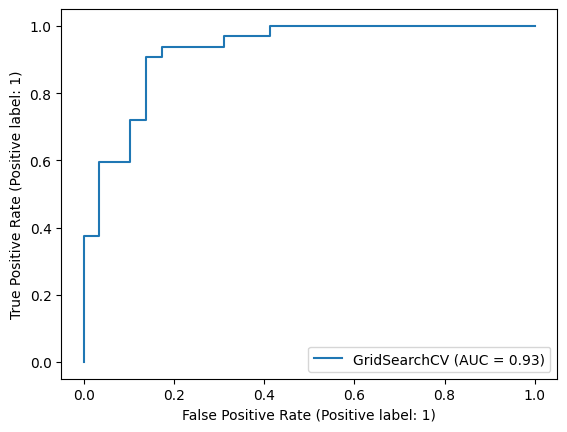

In [39]:
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [41]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


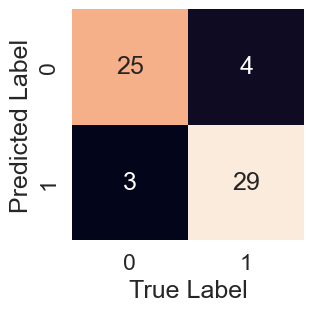

In [45]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot = True,
                   cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test,y_preds)

In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross validation

we're going to calculate precision,recall, and f1 score of our model using cross-validation and to  fo so we'll be using cross-validation-score()

In [47]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

In [49]:
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [52]:
cv_acc = np.mean(cv_acc) 
cv_acc

0.8446994535519124

In [54]:
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring= "precision")
cv_acc = np.mean(cv_acc)
cv_acc

0.8207936507936507

### Feature importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute ?"

Finding the feature importance is different for each machine learning model. One way to find feature importance is to search for "(Model Name) Feature importance".

Let's Find the feature importance for our LogisticRegression Model....

In [56]:
#Fit an instance of Logistic Regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [62]:
#MAtch coef's of features to columns 
feature_dict = dict(zip(heart_disease.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775125744686,
 'sex': -0.8604462617531493,
 'cp': 0.6606705112737149,
 'trestbps': -0.011569930915493508,
 'chol': -0.0016637441846093658,
 'fbs': 0.04386114942757081,
 'restecg': 0.3127582620910283,
 'thalach': 0.02459361246994142,
 'exang': -0.6041306524707951,
 'oldpeak': -0.568628196677622,
 'slope': 0.4505162332451247,
 'ca': -0.636098853689775,
 'thal': -0.6766337271477075}